In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates

Text(0.5, 0, 'Time passed in hours')

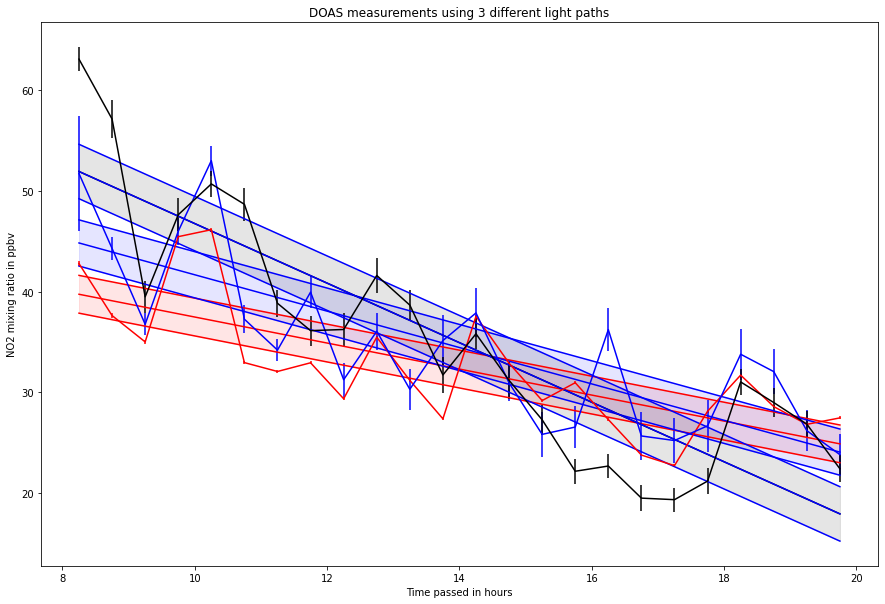

In [37]:
#plotting no2 doas data and its linear regressions

#open the NO2 Doas file and read in the data

data = np.array([[float(i) for i in (' '.join(line.split())).split(' ')] for line
in open('NO2_DOAS_data.txt').readlines()[1:]])

#save the measurements and the uncertainties in variables

t = (data[:,0]-735090)*24
measure1 = data[:,1]
uncert1 = data[:,2]
measure2 = data[:,3]
uncert2 = data[:,4]
measure3 = data[:,5]
uncert3 = data[:,6]

#calculate the covariances and the linear regressions

covariance1=np.cov(t,measure1)
x=np.zeros(2)
x[1]=covariance1[1,0]/covariance1[0,0]
x[0]=np.mean(measure1)-x[1]*np.mean(t)
lin_reg1 = x[0]+ x[1]*t
    
    #calculate uncertainties for the linear regression lines
residual = measure1-lin_reg1
err_std_sq = 1/(len(measure1)-2)*np.sum(residual**2)
t_sq=t**2
x2_std_sq_1 = err_std_sq/t.std()**2
x1_std_sq_1 = x2_std_sq_1*t_sq.mean()
x1_std_1 = np.sqrt(x1_std_sq_1)
x2_std_1 = np.sqrt(x2_std_sq_1)

covariance2=np.cov(t,measure2)
x=np.zeros(2)
x[1]=covariance2[1,0]/covariance2[0,0]
x[0]=np.mean(measure2)-x[1]*np.mean(t)
lin_reg2 = x[0]+ x[1]*t

    #calculate uncertainties for the linear regression lines
residual = measure2-lin_reg2
err_std_sq = 1/(len(measure2)-2)*np.sum(residual**2)
t_sq=t**2
x2_std_sq_2 = err_std_sq/t.std()**2
x1_std_sq_2 = x2_std_sq_2*t_sq.mean()
x1_std_2 = np.sqrt(x1_std_sq_2)
x2_std_2 = np.sqrt(x2_std_sq_2)

covariance3=np.cov(t,measure3)
x=np.zeros(2)
x[1]=covariance3[1,0]/covariance3[0,0]
x[0]=np.mean(measure3)-x[1]*np.mean(t)
lin_reg3 = x[0]+ x[1]*t

    #calculate uncertainties for the linear regression lines
residual = measure3-lin_reg3
err_std_sq = 1/(len(measure3)-2)*np.sum(residual**2)
t_sq=t**2
x2_std_sq_3 = err_std_sq/t.std()**2
x1_std_sq_3 = x2_std_sq_3*t_sq.mean()
x1_std_3 = np.sqrt(x1_std_sq_3)
x2_std_3 = np.sqrt(x2_std_sq_3)


#plot the measurements, their errors and the linear regressions in one figure with a color code

fig = plt.figure(figsize = (15,10))

plt.plot(t, lin_reg1, color = 'r')
plt.plot(t, lin_reg1+0.1*x1_std_1+0.1*x2_std_1, color = 'r')
plt.plot(t, lin_reg1-0.1*x1_std_1-0.1*x2_std_1, color = 'r')
plt.fill_between(t, lin_reg1+0.1*x1_std_1+0.1*x2_std_1, lin_reg1-0.1*x1_std-0.1*x2_std, alpha = 0.1, color = 'r')

plt.plot(t, lin_reg2, color = 'b')
plt.plot(t, lin_reg2+0.1*x1_std_2+0.1*x2_std_2, color = 'b')
plt.plot(t, lin_reg2-0.1*x1_std_2-0.1*x2_std_2, color = 'b')
plt.fill_between(t, lin_reg2+0.1*x1_std_2+0.1*x2_std_2, lin_reg2-0.1*x1_std_2-0.1*x2_std_2, alpha= 0.1, color = 'b')

plt.plot(t, lin_reg3, color = 'k')
plt.plot(t, lin_reg3, color = 'b')
plt.plot(t, lin_reg3+0.1*x1_std_3+0.1*x2_std_3, color = 'b')
plt.plot(t, lin_reg3-0.1*x1_std_3-0.1*x2_std_3, color = 'b')
plt.fill_between(t, lin_reg3+0.1*x1_std_3+0.1*x2_std_3, lin_reg3-0.1*x1_std_3-0.1*x2_std_3, alpha= 0.1, color = 'k')

plt.errorbar(t, measure1, yerr=uncert1, color = 'r')
plt.errorbar(t,measure2, yerr=uncert2, color = 'b')
plt.errorbar(t,measure3, yerr=uncert3, color = 'k')
plt.title('DOAS measurements using 3 different light paths')
plt.ylabel('NO2 mixing ratio in ppbv')
plt.xlabel('Time passed in hours')

**Same Code, but with weighted least squares**

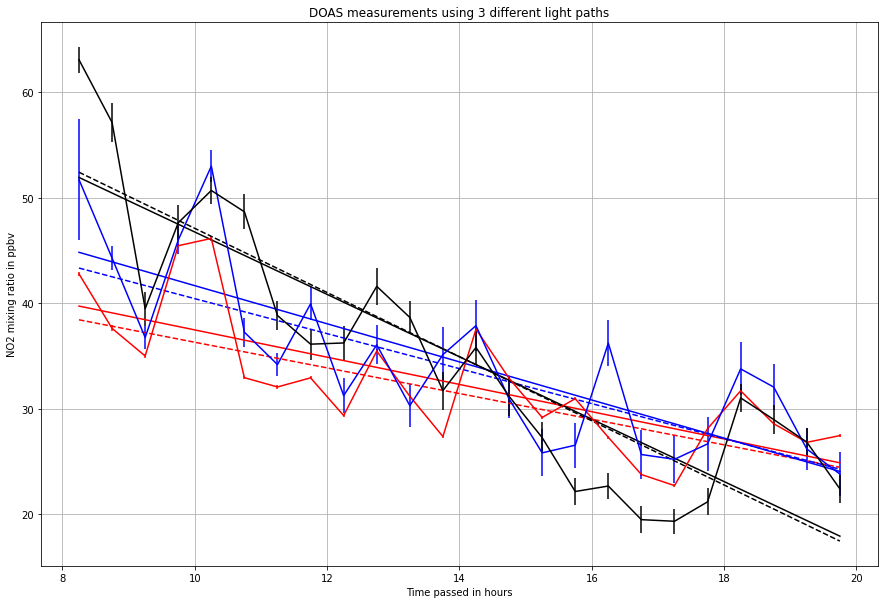

In [52]:
#plotting no2 doas data and its linear regressions

#open the NO2 Doas file and read in the data

data = np.array([[float(i) for i in (' '.join(line.split())).split(' ')] for line
in open('NO2_DOAS_data.txt').readlines()[1:]])

#save the measurements and the uncertainties in variables

t = (data[:,0]-735090)*24
measure1 = data[:,1]
uncert1 = data[:,2]
measure2 = data[:,3]
uncert2 = data[:,4]
measure3 = data[:,5]
uncert3 = data[:,6]

#calculate the covariances and the linear regressions

A1=np.vstack((np.ones(t.shape[0]),t)).T
x1=np.linalg.inv(A1.T.dot(A1)).dot(A1.T).dot(measure1)
w1 = np.diag(1/uncert1**2)
x1_weighted = np.linalg.inv(A1.T.dot(w1).dot(A1)).dot(A1.T).dot(w1).dot(measure1)
lin_reg1 = x1[0]+ x1[1]*t
lin_reg_weighted1 = x1_weighted[0]+ x1_weighted[1]*t
    
    #calculate uncertainties for the linear regression lines
residual = measure1-lin_reg1
err_std_sq = 1/(len(measure1)-2)*np.sum(residual**2)
t_sq=t**2
x2_std_sq_1 = err_std_sq/t.std()**2
x1_std_sq_1 = x2_std_sq_1*t_sq.mean()
x1_std_1 = np.sqrt(x1_std_sq_1)
x2_std_1 = np.sqrt(x2_std_sq_1)

A2=np.vstack((np.ones(t.shape[0]),t)).T
x2=np.linalg.inv(A2.T.dot(A2)).dot(A2.T).dot(measure2)
w2 = np.diag(1/uncert2**2)
x2_weighted = np.linalg.inv(A1.T.dot(w2).dot(A2)).dot(A2.T).dot(w2).dot(measure2)
lin_reg2 = x2[0]+ x2[1]*t
lin_reg_weighted2 = x2_weighted[0]+ x2_weighted[1]*t

    #calculate uncertainties for the linear regression lines
residual = measure2-lin_reg2
err_std_sq = 1/(len(measure2)-2)*np.sum(residual**2)
t_sq=t**2
x2_std_sq_2 = err_std_sq/t.std()**2
x1_std_sq_2 = x2_std_sq_2*t_sq.mean()
x1_std_2 = np.sqrt(x1_std_sq_2)
x2_std_2 = np.sqrt(x2_std_sq_2)


A3=np.vstack((np.ones(t.shape[0]),t)).T
x3=np.linalg.inv(A3.T.dot(A3)).dot(A3.T).dot(measure3)
w3 = np.diag(1/uncert3**2)
x3_weighted = np.linalg.inv(A3.T.dot(w3).dot(A3)).dot(A3.T).dot(w3).dot(measure3)
lin_reg3 = x3[0]+ x3[1]*t
lin_reg_weighted3 = x3_weighted[0]+ x3_weighted[1]*t

    #calculate uncertainties for the linear regression lines
residual = measure3-lin_reg3
err_std_sq = 1/(len(measure3)-2)*np.sum(residual**2)
t_sq=t**2
x2_std_sq_3 = err_std_sq/t.std()**2
x1_std_sq_3 = x2_std_sq_3*t_sq.mean()
x1_std_3 = np.sqrt(x1_std_sq_3)
x2_std_3 = np.sqrt(x2_std_sq_3)


#plot the measurements, their errors and the linear regressions in one figure with a color code

fig = plt.figure(figsize = (15,10))

plt.plot(t, lin_reg1, color = 'r')
plt.plot(t, lin_reg_weighted1, color = 'r', linestyle = 'dashed')

plt.plot(t, lin_reg2, color = 'b')
plt.plot(t, lin_reg_weighted2, color = 'b', linestyle = 'dashed')

plt.plot(t, lin_reg3, color = 'k')
plt.plot(t, lin_reg_weighted3, color = 'k', linestyle = 'dashed')

plt.errorbar(t, measure1, yerr=uncert1, color = 'r')
plt.errorbar(t,measure2, yerr=uncert2, color = 'b')
plt.errorbar(t,measure3, yerr=uncert3, color = 'k')
plt.title('DOAS measurements using 3 different light paths')
plt.ylabel('NO2 mixing ratio in ppbv')
plt.xlabel('Time passed in hours')
plt.grid()
plt.show()